<a href="https://colab.research.google.com/github/raza-abidii/raza_projects_labs/blob/main/Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=50)

In [ ]:
dataset = datasets.fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [ ]:
def NN1(traindata, trainlabel, query):
    dist = np.linalg.norm(traindata - query, axis=1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [ ]:
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

In [ ]:
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4101
Number of train samples: 16539
Percent of test data: 19.86918604651163 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.266173752310536 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.375 %
Validation accuracy using random classifier: 15.3564453125 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.37876960193004 %


In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.893928310168256 %


### Try it out yourself
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?


Validation Percentage: 0.1%
NN Validation Accuracy: 26.70%
Random Classifier Validation Accuracy: 19.08%

Validation Percentage: 1%
NN Validation Accuracy: 25.86%
Random Classifier Validation Accuracy: 16.20%

Validation Percentage: 5%
NN Validation Accuracy: 28.19%
Random Classifier Validation Accuracy: 16.42%

Validation Percentage: 10%
NN Validation Accuracy: 28.82%
Random Classifier Validation Accuracy: 16.37%

Validation Percentage: 20%
NN Validation Accuracy: 31.41%
Random Classifier Validation Accuracy: 16.60%

Validation Percentage: 30%
NN Validation Accuracy: 31.58%
Random Classifier Validation Accuracy: 16.68%

Validation Percentage: 40%
NN Validation Accuracy: 33.00%
Random Classifier Validation Accuracy: 16.38%

Validation Percentage: 50%
NN Validation Accuracy: 32.72%
Random Classifier Validation Accuracy: 16.29%

Validation Percentage: 60%
NN Validation Accuracy: 33.55%
Random Classifier Validation Accuracy: 16.94%

Validation Percentage: 70%
NN Validation Accuracy: 33.73

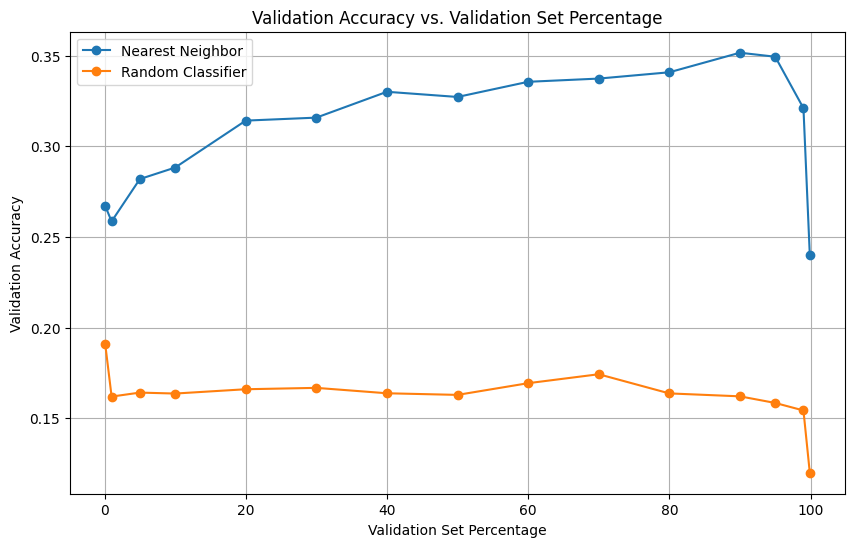

In [ ]:
# Experiment with different validation percentages
val_percentages = [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99, 99.9]
nn_val_accuracies = []
rc_val_accuracies = []

for val_percent in val_percentages:
    traindata, trainlabel, valdata, vallabel = split(
        alltraindata, alltrainlabel, val_percent / 100)

    # Nearest Neighbor
    valpred_nn = NN(traindata, trainlabel, valdata)
    valAccuracy_nn = Accuracy(vallabel, valpred_nn)
    nn_val_accuracies.append(valAccuracy_nn)

    # Random Classifier
    valpred_rc = RandomClassifier(traindata, trainlabel, valdata)
    valAccuracy_rc = Accuracy(vallabel, valpred_rc)
    rc_val_accuracies.append(valAccuracy_rc)

    print(f"Validation Percentage: {val_percent}%")
    print(f"NN Validation Accuracy: {valAccuracy_nn*100:.2f}%")
    print(f"Random Classifier Validation Accuracy: {valAccuracy_rc*100:.2f}%\n")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(val_percentages, nn_val_accuracies, marker='o', label='Nearest Neighbor')
plt.plot(val_percentages, rc_val_accuracies, marker='o', label='Random Classifier')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Validation Set Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Multiple Splits


In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 34.173168717771965 %
Test accuracy: 34.893928310168256 %


Experimenting with consistency:
Single split accuracy (mean, std): (0.3540, 0.0000)
Multiple splits accuracy (mean, std over 10 iterations): (0.3398, 0.0047)
Observe that the standard deviation for multiple splits is likely lower, indicating more consistency.

Average validation accuracy over 10 iterations: 34.10%
Test accuracy: 34.89%
The average validation accuracy is likely closer to the test accuracy than a single validation run.

Experimenting with number of iterations:
Average validation accuracy with 1 iterations: 33.63%
Average validation accuracy with 5 iterations: 33.92%
Average validation accuracy with 10 iterations: 34.20%
Average validation accuracy with 50 iterations: 34.06%
Average validation accuracy with 100 iterations: 34.15%


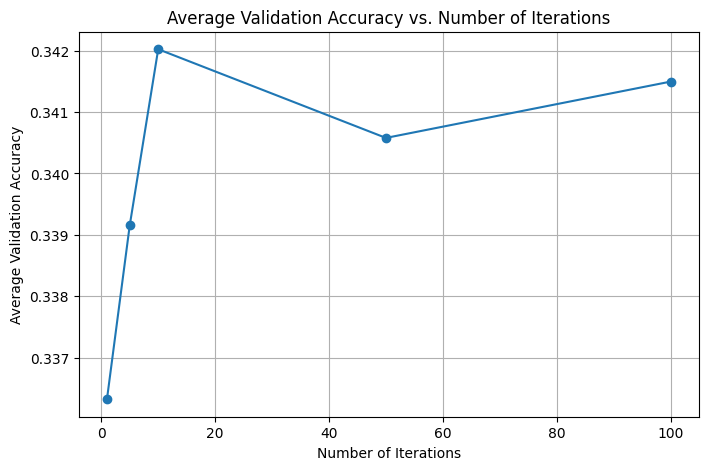

As the number of iterations increases, the average validation accuracy estimate tends to stabilize.

Can we deal with a very small train/validation dataset by increasing iterations?
Increasing iterations helps stabilize the estimate for a given dataset size (reducing variance of the estimate).
However, it cannot fully compensate for a dataset that is too small for the model to learn effectively (affecting bias).
A small training set limits the model's ability to generalize.
A small validation set might not be representative of the test data.
Therefore, while useful, increasing iterations alone cannot overcome the limitations of insufficient data.


In [ ]:
def experiment_consistency(data, label, split_percent, iterations, classifier):
    accuracies = []
    for _ in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(data, label, split_percent)
        valpred = classifier(traindata, trainlabel, valdata)
        accuracies.append(Accuracy(vallabel, valpred))
    return np.mean(accuracies), np.std(accuracies)

print("Experimenting with consistency:")
mean_acc_single, std_acc_single = experiment_consistency(alltraindata, alltrainlabel, 75 / 100, 1, classifier=NN)
mean_acc_multi, std_acc_multi = experiment_consistency(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)

print(f"Single split accuracy (mean, std): ({mean_acc_single:.4f}, {std_acc_single:.4f})")
print(f"Multiple splits accuracy (mean, std over 10 iterations): ({mean_acc_multi:.4f}, {std_acc_multi:.4f})")
print("Observe that the standard deviation for multiple splits is likely lower, indicating more consistency.")

avg_val_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print(f"\nAverage validation accuracy over 10 iterations: {avg_val_acc*100:.2f}%")

testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print(f"Test accuracy: {testAccuracy*100:.2f}%")
print("The average validation accuracy is likely closer to the test accuracy than a single validation run.")


iterations_list = [1, 5, 10, 50, 100]
avg_accuracies = []

print("\nExperimenting with number of iterations:")
for iterations in iterations_list:
    avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, iterations, classifier=NN)
    avg_accuracies.append(avg_acc)
    print(f"Average validation accuracy with {iterations} iterations: {avg_acc*100:.2f}%")


plt.figure(figsize=(8, 5))
plt.plot(iterations_list, avg_accuracies, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Average Validation Accuracy')
plt.title('Average Validation Accuracy vs. Number of Iterations')
plt.grid(True)
plt.show()
print("As the number of iterations increases, the average validation accuracy estimate tends to stabilize.")

print("\nCan we deal with a very small train/validation dataset by increasing iterations?")
print("Increasing iterations helps stabilize the estimate for a given dataset size (reducing variance of the estimate).")
print("However, it cannot fully compensate for a dataset that is too small for the model to learn effectively (affecting bias).")
print("A small training set limits the model's ability to generalize.")
print("A small validation set might not be representative of the test data.")
print("Therefore, while useful, increasing iterations alone cannot overcome the limitations of insufficient data.")

## Exercise:
>How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

In [ ]:
def NNK(traindata, trainlabel, query, k):
    dist = np.linalg.norm(traindata - query, axis=1)
    # Get indices of the k nearest neighbors
    nearest_indices = np.argsort(dist)[:k]
    # Get the labels of the k nearest neighbors
    nearest_labels = trainlabel[nearest_indices]
    # Find the most frequent label among the k neighbors
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

def NNK_Classifier(traindata, trainlabel, testdata, k):
    predlabel = np.array([NNK(traindata, trainlabel, i, k) for i in testdata])
    return predlabel

In [ ]:
def AverageAccuracyNNK(alldata, alllabel, splitpercent, iterations, k):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = NNK_Classifier(traindata, trainlabel, valdata, k)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [ ]:
split_percentage = 75 / 100
iterations_list = [1, 5, 10, 50, 100]
nn1_avg_accuracies_iterations = []
nn3_avg_accuracies_iterations = []

print("Experimenting with number of splits:")
for iterations in iterations_list:
    avg_acc_nn1 = AverageAccuracyNNK(alltraindata, alltrainlabel, split_percentage, iterations, k=1)
    nn1_avg_accuracies_iterations.append(avg_acc_nn1)
    avg_acc_nn3 = AverageAccuracyNNK(alltraindata, alltrainlabel, split_percentage, iterations, k=3)
    nn3_avg_accuracies_iterations.append(avg_acc_nn3)
    print(f"Iterations: {iterations}, NN-1 Avg Accuracy: {avg_acc_nn1*100:.2f}%, NN-3 Avg Accuracy: {avg_acc_nn3*100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(iterations_list, nn1_avg_accuracies_iterations, marker='o', label='NN-1')
plt.plot(iterations_list, nn3_avg_accuracies_iterations, marker='o', label='NN-3')
plt.xlabel('Number of Splits (Iterations)')
plt.ylabel('Average Validation Accuracy')
plt.title('Average Validation Accuracy vs. Number of Splits (Split Size 75%)')
plt.legend()
plt.grid(True)
plt.show()

split_percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]
iterations = 10
nn1_avg_accuracies_split = []
nn3_avg_accuracies_split = []

print("\nExperimenting with split size:")
for split_percent in split_percentages:
    avg_acc_nn1 = AverageAccuracyNNK(alltraindata, alltrainlabel, split_percent / 100, iterations, k=1)
    nn1_avg_accuracies_split.append(avg_acc_nn1)
    avg_acc_nn3 = AverageAccuracyNNK(alltraindata, alltrainlabel, split_percent / 100, iterations, k=3)
    nn3_avg_accuracies_split.append(avg_acc_nn3)
    print(f"Split Percentage: {split_percent}%, NN-1 Avg Accuracy: {avg_acc_nn1*100:.2f}%, NN-3 Avg Accuracy: {avg_acc_nn3*100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(split_percentages, nn1_avg_accuracies_split, marker='o', label='NN-1')
plt.plot(split_percentages, nn3_avg_accuracies_split, marker='o', label='NN-3')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Average Validation Accuracy (10 Iterations)')
plt.title('Average Validation Accuracy vs. Validation Set Percentage')
plt.legend()
plt.grid(True)
plt.show()

Experimenting with number of splits:
Iterations: 1, NN-1 Avg Accuracy: 34.22%, NN-3 Avg Accuracy: 34.24%
Iterations: 5, NN-1 Avg Accuracy: 34.14%, NN-3 Avg Accuracy: 34.32%
Iterations: 10, NN-1 Avg Accuracy: 34.08%, NN-3 Avg Accuracy: 34.47%
Iterations: 50, NN-1 Avg Accuracy: 34.08%, NN-3 Avg Accuracy: 34.26%
